<h1><b><font color='pink'>MNIST Handwritten Digit Classification </font></h1>

<b><font color='purple' size='4'>this is a Handwritten Digit Classifier using Deep Learning method.
here i will be using MNIST dataset (Modified National Institute of Standards and Technology database ) and it is a large database of handwritten digits that is commonly used for training various image processing systems</font>

In [75]:
#import needed libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


In [28]:
#split the MNIST dataset into Train-Test 
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [29]:
print("X Train length = " , len(X_train))
print("X Test length = " , len(X_test))
print("Y Train length = " , len(Y_train))
print("Y Test length = " , len(Y_test))

X Train length =  60000
X Test length =  10000
Y Train length =  60000
Y Test length =  10000


<font color='beige' size=5>check the shape and values of train-test values </font>

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

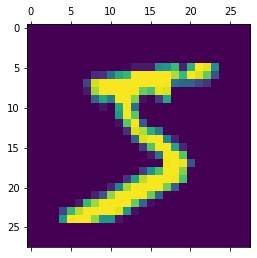

In [33]:
#plot first value in training dataset using matplotlib
plt.matshow(X_train[0])

In [34]:
Y_train[0]

5

<font color='beige' size=5> Scale and reshape the dataset </font>

In [51]:
#scale to 0 and 1 for better model fit accuracy

X_train=X_train/255
X_test=X_test/255

In [52]:
#flatten the pixels in 1D Array

XTrain_1D=X_train.reshape(len(X_train),28*28)
XTest_1D=X_test.reshape(len(X_test),28*28)

In [53]:
XTrain_1D[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
XTest_1D[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [56]:
XTrain_1D.shape

(60000, 784)

In [57]:
XTest_1D.shape

(10000, 784)

<font color='beige' size=5>Deep Learning Step : </font>

In [96]:
#Create Neural Network
NN_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

NN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

NN_model.fit(XTrain_1D,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4759 - accuracy: 0.8746
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3046 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2736 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9265


In [97]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = NN_model.evaluate(XTest_1D, Y_test)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.9258
test loss, test acc: [0.2663986086845398, 0.9258000254631042]


<font color='yellow' size=5>This concludes the Accuracy of the Neural Network model with one layer =<b> 92.5% </b></font>

<font color='beige' size=5>Predict using the model:</font>

In [98]:
predict=NN_model.predict(XTest_1D)

313/313 [==============================] - 0s 1ms/step


In [99]:
print('first 5 values in :')
print(' Y test:' , Y_test[:5])

predicted_values=[np.argmax(i) for i in predict]

print('Y Predicted:' , predicted_values[:5])

first 5 values in :
 Y test: [7 2 1 0 4]
Y Predicted: [7, 2, 1, 0, 4]


<font color='beige' size=5>heatmap to the confusion matrix predicted values vs actual values</font>

In [74]:
ConfusionMatrix=tf.math.confusion_matrix(labels=Y_test,predictions=predicted_values)
ConfusionMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    1,    2,    0,    5,   15,    3,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  920,   19,    7,    3,   16,   10,   37,    5],
       [   2,    0,   16,  933,    0,   15,    6,   11,   18,    9],
       [   1,    1,    2,    2,  896,    0,   19,    5,    9,   47],
       [   8,    3,    2,   44,   10,  756,   25,    8,   29,    7],
       [   6,    3,    3,    1,    6,    7,  929,    2,    1,    0],
       [   1,    6,   22,    9,    4,    0,    0,  948,    3,   35],
       [   5,    9,    6,   22,    8,   20,   11,   11,  874,    8],
       [   9,    7,    1,   13,   18,    5,    1,   24,    7,  924]])>

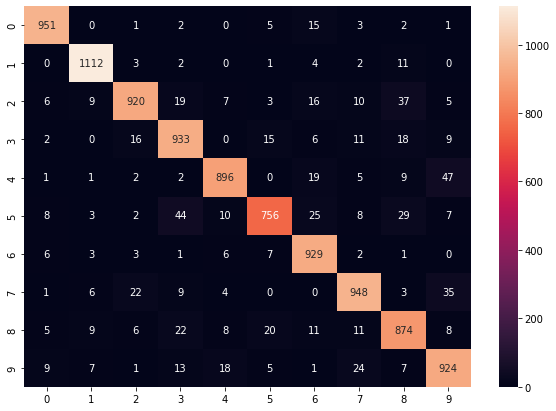

In [80]:
#plot the confusion matrix using seaborn

plt.figure(figsize=(10,7))
sns.heatmap(ConfusionMatrix,annot=True,fmt='d')
plt.xlabel=('predicted Values')
plt.ylabel=('Real Values')


<font color='beige' size=5>Let's try to increase the Accuracy by adding Hidden Layer to the Neural Network</font>

In [95]:
#Create hidden layer Neural Network
NN_model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

NN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

NN_model.fit(XTrain_1D,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2716 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1236 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9840


In [83]:
print("Evaluate on test data")
results = NN_model.evaluate(XTest_1D, Y_test)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 1ms/step - loss: 0.0843 - accuracy: 0.9730
test loss, test acc: [0.08434557914733887, 0.9729999899864197]


<font color='beige' size=5>by adding one hidden layer, the accuracy increased to <b>97.3%</b></font>

<font color='beige' size=5>Predict using the 2 layers model</font>

In [84]:
predict1=NN_model.predict(XTest_1D)

313/313 [==============================] - 0s 1ms/step


In [87]:
print('first 5 values in :')
print(' Y test:' , Y_test[:5])

predicted_values_2layers=[np.argmax(i) for i in predict]

print('Y Predicted:' , predicted_values_2layers[:5])

first 5 values in :
 Y test: [7 2 1 0 4]
Y Predicted: [7, 2, 1, 0, 4]


<font color='beige' size=5>heatmap to the confusion matrix predicted values vs actual values</font>

In [89]:
ConfusionMatrix_hiddenLayer=tf.math.confusion_matrix(labels=Y_test,predictions=predicted_values_2layers)
ConfusionMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    1,    2,    0,    5,   15,    3,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  920,   19,    7,    3,   16,   10,   37,    5],
       [   2,    0,   16,  933,    0,   15,    6,   11,   18,    9],
       [   1,    1,    2,    2,  896,    0,   19,    5,    9,   47],
       [   8,    3,    2,   44,   10,  756,   25,    8,   29,    7],
       [   6,    3,    3,    1,    6,    7,  929,    2,    1,    0],
       [   1,    6,   22,    9,    4,    0,    0,  948,    3,   35],
       [   5,    9,    6,   22,    8,   20,   11,   11,  874,    8],
       [   9,    7,    1,   13,   18,    5,    1,   24,    7,  924]])>

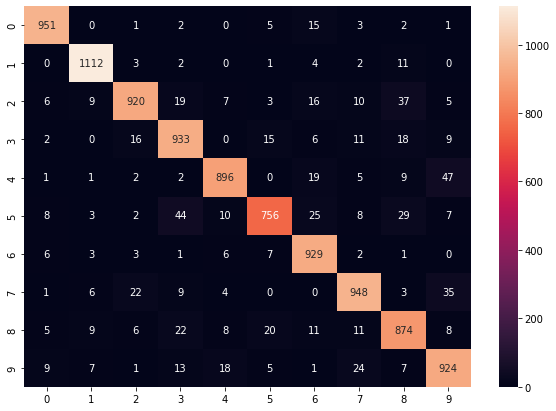

In [90]:
#plot the confusion matrix using seaborn

plt.figure(figsize=(10,7))
sns.heatmap(ConfusionMatrix_hiddenLayer,annot=True,fmt='d')
plt.xlabel=('predicted Values')
plt.ylabel=('Real Values')
